In [1]:
!pip install google-cloud-bigquery==1.25.0
!pip install --upgrade google-cloud-bigquery-storage

     |████████████████████████████████| 169 kB 5.4 MB/s eta 0:00:01
  Attempting uninstall: google-resumable-media
    Found existing installation: google-resumable-media 1.2.0
    Uninstalling google-resumable-media-1.2.0:
      Successfully uninstalled google-resumable-media-1.2.0
  Attempting uninstall: google-cloud-bigquery
    Found existing installation: google-cloud-bigquery 2.13.1
    Uninstalling google-cloud-bigquery-2.13.1:
      Successfully uninstalled google-cloud-bigquery-2.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-storage 1.37.1 requires google-resumable-media<2.0dev,>=1.2.0, but you have google-resumable-media 0.5.1 which is incompatible.


# Import the BigQuery Python Client Library and initialize a client

*The BigQuery client will be used to send and receive messages from the BigQuery API.*

In [2]:
from google.cloud import bigquery

client = bigquery.Client()

# Run a query on the BigQuery natality public dataset:

In [3]:
sql = """
  SELECT
    plurality,
    COUNT(1) AS count,
    year
  FROM
    `bigquery-public-data.samples.natality`
  WHERE
    NOT IS_NAN(plurality) AND plurality > 1
  GROUP BY
    plurality, year
  ORDER BY
    count DESC
"""
df = client.query(sql).to_dataframe()
df.head()

,plurality,count,year
0,2,139209,2007
1,2,138866,2008
2,2,137239,2006
3,2,133285,2005
4,2,132344,2004


### Note: This dataset describes all United States births registered from 1969 to 2008. This query returns the annual count of plural births by plurality (2 for twins, 3 for triplets, etc.).

# pivot the data and create a stacked bar chart of the count of plural births over time:

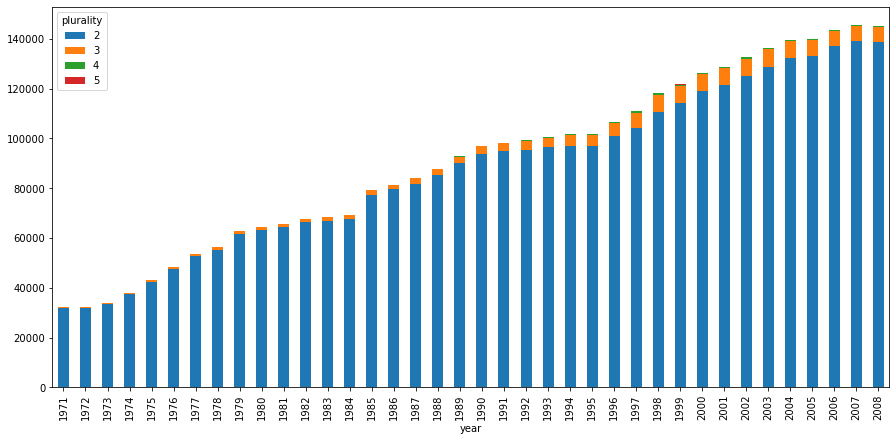

In [4]:
pivot_table = df.pivot(index='year', columns='plurality', values='count')
pivot_table.plot(kind='bar', stacked=True, figsize=(15,7));

# Take a look at baby weight by gender:

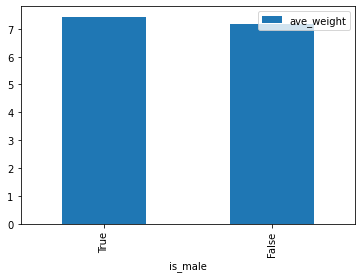

In [5]:
sql = """
  SELECT
    is_male,
    AVG(weight_pounds) AS ave_weight
  FROM
    `bigquery-public-data.samples.natality`
  GROUP BY
    is_male
"""
df = client.query(sql).to_dataframe()
df.plot(x='is_male', y='ave_weight', kind='bar');

# See how the baby's weight fluctuates according to the number of gestation weeks:

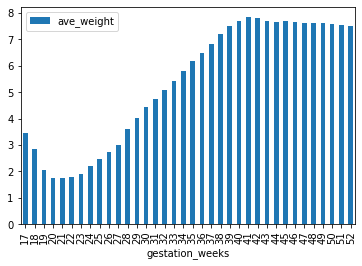

In [6]:
sql = """
  SELECT
    gestation_weeks,
    AVG(weight_pounds) AS ave_weight
  FROM
    `bigquery-public-data.samples.natality`
  WHERE
    NOT IS_NAN(gestation_weeks) AND gestation_weeks <> 99
  GROUP BY
    gestation_weeks
  ORDER BY
    gestation_weeks
"""
df = client.query(sql).to_dataframe()
df.plot(x='gestation_weeks', y='ave_weight', kind='bar');

### Note: Because the gestation_weeks field allows null values and stores unknown values as 99, this query excludes records where gestation_weeks is null or 99.

*Now we have a chart that shows how the weight of the baby relates to the number of weeks of gestation.*